<a href="https://colab.research.google.com/github/priyanshu-buwade/SMES_IoT_Assignments/blob/main/SMES_Predict_Temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using Linear Regression predict the temperature of next year based on previous 10 years temperature data.**

---

Import all the necessary packages.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler

Prepairing Data.

In [ ]:
data = {
    'Year': [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Temperature': [33, 35, 34, 33.5, 31, 35, 40, 37, 36]
}
df = pd.DataFrame(data)

Calculating Mean and Standard Deviation.

In [ ]:
mean_year = np.mean(df['Year'])
mean_temp = np.mean(df['Temperature'])
std_year = np.std(df['Year'], ddof=1)
std_temp = np.std(df['Temperature'], ddof=1)

Calculating Coefficiants (β0, β1)

In [ ]:
X = df['Year'].values.reshape(-1, 1)
y = df['Temperature'].values

model = LinearRegression()
model.fit(X, y)

beta1 = model.coef_[0]  # Slope
beta0 = model.intercept_  # Intercept

Predicting Temperature for year 2024.

In [ ]:
year_to_predict = 2024
predicted_temp = beta0 + beta1 * year_to_predict

Calculating Residuals and Mean Squared Error (MSE).

In [ ]:
predictions = model.predict(X)
residuals = y - predictions
mse = mean_squared_error(y, predictions)

Normalizing Data (MinMax, Z-Score).

In [ ]:
min_max_scaler = MinMaxScaler()
z_score_scaler = StandardScaler()

normalized_temp_minmax = min_max_scaler.fit_transform(df[['Temperature']])
normalized_temp_zscore = z_score_scaler.fit_transform(df[['Temperature']])

Verifying Linearity of Error.

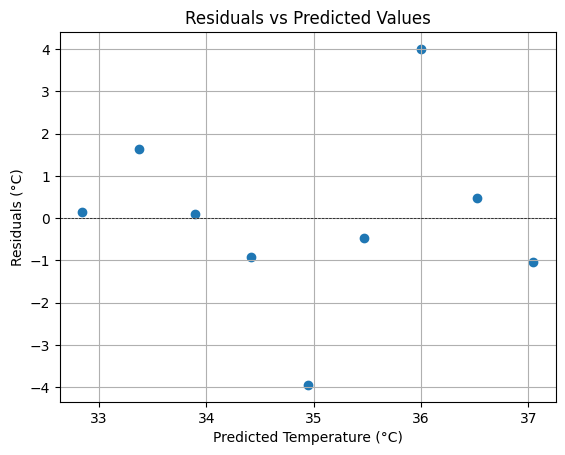

In [ ]:
plt.scatter(predictions, residuals)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Temperature (°C)')
plt.ylabel('Residuals (°C)')
plt.grid()
plt.show()

Output Results

In [ ]:
print(f"Predicted temperature in 2024: {predicted_temp:.2f}°C")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Normalized Temperature (Min-Max): {normalized_temp_minmax.flatten()}")
print(f"Normalized Temperature (Z-Score): {normalized_temp_zscore.flatten()}")

Predicted temperature in 2024: 37.57°C
Mean Squared Error (MSE): 4.08
Normalized Temperature (Min-Max): [0.22222222 0.44444444 0.33333333 0.27777778 0.         0.44444444
 1.         0.66666667 0.55555556]
Normalized Temperature (Z-Score): [-0.79959541  0.02284558 -0.38837491 -0.59398516 -1.6220364   0.02284558
  2.07894806  0.84528658  0.43406608]
